<a href="https://colab.research.google.com/github/jburchfield76/datasharing/blob/master/Time_Series_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


<ipython-input-2-fed6c97caa1a>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range(start='2023-01-01', periods=10, freq='M'),


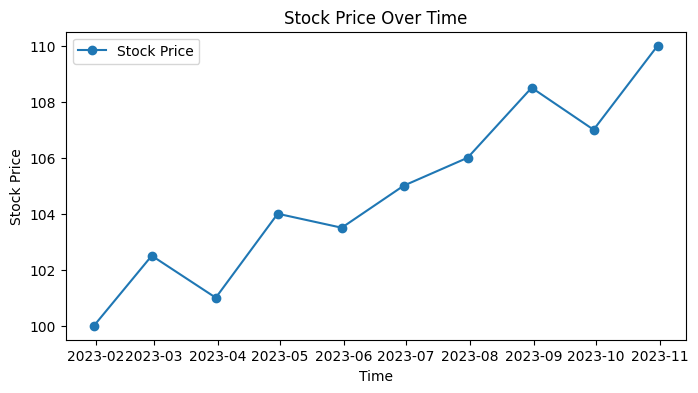

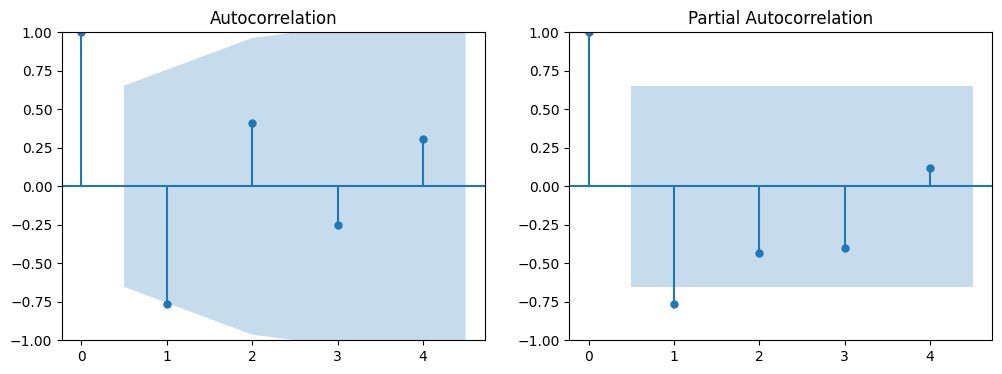

In [2]:
# Create data
data = {
    'Month': pd.date_range(start='2023-01-01', periods=10, freq='M'),
    'Stock_Price': [100.0, 102.5, 101.0, 104.0, 103.5, 105.0, 106.0, 108.5, 107.0, 110.0]
}

df = pd.DataFrame(data)
df.set_index('Month', inplace=True)  # Set date as index

# Plot the original data
plt.figure(figsize=(8, 4))
plt.plot(df['Stock_Price'], marker='o', linestyle='-', label="Stock Price")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Over Time")
plt.legend()
plt.show()

# First Differencing (d=1)
df['Differenced'] = df['Stock_Price'].diff()

# ACF & PACF plots to identify p and q
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['Differenced'].dropna(), ax=axes[0])
plot_pacf(df['Differenced'].dropna(), ax=axes[1])
plt.show()


In [3]:
# Fit ARIMA(1,1,1) model-see GPT convo for assumption
model = ARIMA(df['Stock_Price'], order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast next 3 months
forecast = model_fit.forecast(steps=3)
print("\nForecasted Stock Prices for Next 3 Months:")
print(forecast)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Stock_Price   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -16.473
Date:                Fri, 28 Feb 2025   AIC                             38.946
Time:                        04:20:09   BIC                             39.538
Sample:                    01-31-2023   HQIC                            37.669
                         - 10-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.071    -14.062      0.000      -1.139      -0.861
ma.L1          0.9945     19.853      0.050      0.960     -37.917      39.906
sigma2         1.6967     32.814      0.052      0.9

<ipython-input-4-7268da2d54e7>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=4, freq='M')[1:], forecast, marker='o', linestyle='--', color='red', label="Forecasted Price")


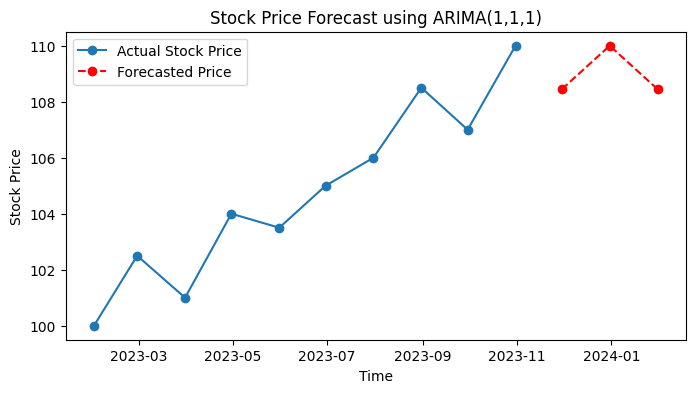

In [4]:
# Plot actual vs predicted
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Stock_Price'], marker='o', linestyle='-', label="Actual Stock Price")
plt.plot(pd.date_range(df.index[-1], periods=4, freq='M')[1:], forecast, marker='o', linestyle='--', color='red', label="Forecasted Price")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Forecast using ARIMA(1,1,1)")
plt.legend()
plt.show()
